In [84]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Excelデータの読み込み
file_path = '/Users/ryoma/BLP/yosoku/【10月】生産性結果記入用紙_Ver.4.3 (1).xlsx'  # Excelファイルのパスを指定
sheet_name = '実績昼'  # 読み込むシート名を指定

data = pd.read_excel(file_path, sheet_name=sheet_name)
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,作業ライン,項目,2024-10-01 00:00:00,2024-10-02 00:00:00,2024-10-03 00:00:00,2024-10-04 00:00:00,2024-10-05 00:00:00,2024-10-06 00:00:00,2024-10-07 00:00:00,2024-10-08 00:00:00,...,2024-10-23 00:00:00,2024-10-24 00:00:00,2024-10-25 00:00:00,2024-10-26 00:00:00,2024-10-27 00:00:00,2024-10-28 00:00:00,2024-10-29 00:00:00,2024-10-30 00:00:00,2024-10-31 00:00:00,合計
2,A-PaLS,件数,0,1756,2125,2433,1490,0,2455,2921,...,2941,2498,2941,1249,0,2893,2264,297,170,57837
3,NaN,作業時間(分),0,4302,4740,7002,4620,0,5544,7026,...,8190,5871,7326,4485,0,6240,5694,771,486,154956
4,NaN,目標件数,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# 行列を逆にする
data = data.T
# 1行目を列名にする
data.columns = data.iloc[1]
# 0,1行目を削除
data = data.drop(data.index[[0, 1]])
data.head()


Unnamed: 1,NaN,項目,件数,作業時間(分),目標件数,NaN,作業人数,リーダー人数,合計作業人数,作業ライン,...,1本あたりの平均作業数,NaN,NaN,予測,買い合わせ平均,作業時間(分),NaN,項目,生産性(分/件),1日作業量/L
Unnamed: 2,NaN,2024-10-01 00:00:00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,1,0,0
Unnamed: 3,NaN,2024-10-02 00:00:00,1756,4302,NaN,NaN,7,5,12,4,...,439,NaN,NaN,NaN,NaN,595,NaN,2,2.449886,177.559275
Unnamed: 4,NaN,2024-10-03 00:00:00,2125,4740,NaN,NaN,6,6,12,4,...,531.25,NaN,NaN,NaN,NaN,780,NaN,3,2.230588,195.015823
Unnamed: 5,NaN,2024-10-04 00:00:00,2433,7002,NaN,NaN,12,6,18,6,...,405.5,NaN,NaN,NaN,NaN,0,NaN,4,2.877928,151.150386
Unnamed: 6,NaN,2024-10-05 00:00:00,1490,4620,NaN,NaN,13,2,15,5,...,298,NaN,NaN,NaN,NaN,0,NaN,5,3.100671,140.292208


In [86]:
# 欠損値を探す
data.isnull().sum()


Unnamed: 1
NaN            32
項目              0
件数              0
作業時間(分)         0
目標件数           32
NaN            32
作業人数            4
リーダー人数          4
合計作業人数          2
作業ライン           5
1人あたりの作業時間      5
1本あたりの平均作業数     5
NaN            32
NaN            32
予測             32
買い合わせ平均        32
作業時間(分)         0
NaN            32
項目              0
生産性(分/件)        0
1日作業量/L         0
dtype: int64

In [87]:
# 0,1,4,7,8,9列目を削除
data = data.drop(data.columns[[0, 1, 4,14,15]], axis=1)
data.head()

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,作業時間(分),生産性(分/件),1日作業量/L
Unnamed: 2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
Unnamed: 3,1756,4302,7,5,12,4,358.5,439,595,2.449886,177.559275
Unnamed: 4,2125,4740,6,6,12,4,395,531.25,780,2.230588,195.015823
Unnamed: 5,2433,7002,12,6,18,6,389,405.5,0,2.877928,151.150386
Unnamed: 6,1490,4620,13,2,15,5,308,298,0,3.100671,140.292208


In [88]:
# NaNを全て0に変換
data = data.fillna(0)
data.head()

/var/folders/zn/w212lcms0dxb2bg4lyzl6pxm0000gn/T/ipykernel_64630/287054918.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(0)


Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,作業時間(分),生産性(分/件),1日作業量/L
Unnamed: 2,0,0,0,0,0,0,0.0,0.00,0,0.000000,0.000000
Unnamed: 3,1756,4302,7,5,12,4,358.5,439.00,595,2.449886,177.559275
Unnamed: 4,2125,4740,6,6,12,4,395.0,531.25,780,2.230588,195.015823
Unnamed: 5,2433,7002,12,6,18,6,389.0,405.50,0,2.877928,151.150386
Unnamed: 6,1490,4620,13,2,15,5,308.0,298.00,0,3.100671,140.292208


In [89]:
# 0列目のデータを表示
data.iloc[:, 0]
data

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,作業時間(分),生産性(分/件),1日作業量/L
Unnamed: 2,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 3,1756,4302,7,5,12,4,358.500000,439.000000,595,2.449886,177.559275
Unnamed: 4,2125,4740,6,6,12,4,395.000000,531.250000,780,2.230588,195.015823
Unnamed: 5,2433,7002,12,6,18,6,389.000000,405.500000,0,2.877928,151.150386
Unnamed: 6,1490,4620,13,2,15,5,308.000000,298.000000,0,3.100671,140.292208
Unnamed: 7,0,0,11,4,15,5,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 8,2455,5544,11,4,15,5,369.600000,491.000000,0,2.258248,192.627165
Unnamed: 9,2921,7026,18,3,21,7,334.571429,417.285714,0,2.405341,180.847566
Unnamed: 10,2138,7905,17,4,21,7,376.428571,305.428571,0,3.697381,117.650854
Unnamed: 11,1921,7332,17,4,21,7,349.142857,274.428571,0,3.816762,113.970949


In [90]:
# 33,34行目を削除
data = data.drop(data.index[[31]])
data

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,作業時間(分),生産性(分/件),1日作業量/L
Unnamed: 2,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 3,1756,4302,7,5,12,4,358.500000,439.000000,595,2.449886,177.559275
Unnamed: 4,2125,4740,6,6,12,4,395.000000,531.250000,780,2.230588,195.015823
Unnamed: 5,2433,7002,12,6,18,6,389.000000,405.500000,0,2.877928,151.150386
Unnamed: 6,1490,4620,13,2,15,5,308.000000,298.000000,0,3.100671,140.292208
Unnamed: 7,0,0,11,4,15,5,0.000000,0.000000,0,0.000000,0.000000
Unnamed: 8,2455,5544,11,4,15,5,369.600000,491.000000,0,2.258248,192.627165
Unnamed: 9,2921,7026,18,3,21,7,334.571429,417.285714,0,2.405341,180.847566
Unnamed: 10,2138,7905,17,4,21,7,376.428571,305.428571,0,3.697381,117.650854
Unnamed: 11,1921,7332,17,4,21,7,349.142857,274.428571,0,3.816762,113.970949


In [91]:
# 正規化 -1から1の範囲に収める  
data2 = data.astype(float) # データ型をfloatに変換
data2 = (data - data.mean()) / data.std() # 正規化。各列の値から平均を引いて標準偏差で割る
data2

Unnamed: 1,件数,作業時間(分),作業人数,リーダー人数,合計作業人数,作業ライン,1人あたりの作業時間,1本あたりの平均作業数,作業時間(分),生産性(分/件),1日作業量/L
Unnamed: 2,-1.695312,-1.747876,-1.964018,-1.814575,-2.085341,-2.085341,-1.953342,-1.846947,-0.396144,-2.061162,-2.083291
Unnamed: 3,-0.099690,-0.243576,-0.854143,1.209717,-0.459037,-0.459037,0.618594,0.803604,-0.057941,0.134277,0.621447
Unnamed: 4,0.235609,-0.090419,-1.012697,1.814575,-0.459037,-0.459037,0.880451,1.360581,0.047215,-0.062245,0.887360
Unnamed: 5,0.515479,0.700544,-0.061376,1.814575,0.354114,0.354114,0.837406,0.601341,-0.396144,0.517862,0.219163
Unnamed: 6,-0.341396,-0.132380,0.097178,-0.604858,-0.052461,-0.052461,0.256299,-0.047712,-0.396144,0.717471,0.053762
Unnamed: 7,-1.695312,-1.747876,-0.219929,0.604858,-0.052461,-0.052461,-1.953342,-1.846947,-0.396144,-2.061162,-2.083291
Unnamed: 8,0.535470,0.190719,-0.219929,0.604858,-0.052461,-0.052461,0.698228,1.117564,-0.396144,-0.037457,0.850974
Unnamed: 9,0.958909,0.708937,0.889945,0.000000,0.760690,0.760690,0.446927,0.672499,-0.396144,0.094358,0.671537
Unnamed: 10,0.247422,1.016300,0.731392,0.604858,0.760690,0.760690,0.747217,-0.002861,-0.396144,1.252206,-0.291131
Unnamed: 11,0.050241,0.815937,0.731392,0.604858,0.760690,0.760690,0.551465,-0.190029,-0.396144,1.359188,-0.347186


In [98]:
# 目的変数と説明変数の設定
# 'target_column'を目的変数として、他のすべてのカラムを説明変数とする
X = data2.drop(columns= '件数')
y = data2['件数']

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレスト回帰モデルの構築
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.06351019197805527
R² Score: 0.9139814795255068


In [101]:
print(X_test)

Unnamed: 1    作業時間(分)      作業人数    リーダー人数    合計作業人数     作業ライン  1人あたりの作業時間  \
Unnamed: 29  0.434093  0.889945  0.000000  0.760690  0.760690    0.178408   
Unnamed: 17  0.895663  0.731392  0.604858  0.760690  0.760690    0.629356   
Unnamed: 25  0.305063  0.731392  0.604858  0.760690  0.760690    0.052348   
Unnamed: 19  1.054065  0.731392  0.604858  0.760690  0.760690    0.784112   
Unnamed: 10  1.016300  0.731392  0.604858  0.760690  0.760690    0.747217   
Unnamed: 11  0.815937  0.731392  0.604858  0.760690  0.760690    0.551465   
Unnamed: 31 -1.478277 -1.171250 -1.209717 -1.272189 -1.272189   -1.031462   

Unnamed: 1   1本あたりの平均作業数   作業時間(分)  生産性(分/件)   1日作業量/L  
Unnamed: 29     0.648348  3.573616 -0.128252  0.988806  
Unnamed: 17     1.211580 -0.396144 -0.150612  1.024759  
Unnamed: 25     0.307650  1.175504  0.045016  0.736075  
Unnamed: 19     0.456005 -0.396144  0.628262  0.124649  
Unnamed: 10    -0.002861 -0.396144  1.252206 -0.291131  
Unnamed: 11    -0.190029 -0.396144  1.359

In [99]:
from sklearn.model_selection import RandomizedSearchCV

# ランダムフォレストのハイパーパラメータの範囲設定
param_distributions = {
    'n_estimators': [int(x) for x in range(100, 1100, 100)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in range(10, 110, 10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# ランダムサーチの設定
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# ランダムサーチの実行（クロスバリデーション実施）
rf_random.fit(X_train, y_train)

# ベストパラメータの取得
best_params = rf_random.best_params_
print(f'Best parameters found: {best_params}')

# 最適パラメータでモデル再構築
best_model = rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600

/Users/ryoma/BLP/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ryoma/BLP/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ryoma/BLP/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/ryoma/BLP/.venv/lib/python3.13/site-packages/sklearn/base.p

In [100]:
# 実際に件数を予測
X_new = X_test.iloc[0].values.reshape(1, -1) # 1行のデータを2次元配列に変換
y_new = model.predict(X_new)
# Predictedは予測値、Actualは実際の値、Errorは予測値と実際の値の差
print(f'Predicted: {y_new[0]}')
print(f'Actual: {y_test.iloc[0]}')
print(f'Error: {y_test.iloc[0] - y_new[0]}')
# 正規化する前の値に戻す
X_new = X_new * data.drop(columns='件数').std().values + data.drop(columns='件数').mean().values
y_new = y_new * data['件数'].std() + data['件数'].mean()
y_test = y_test * data['件数'].std() + data['件数'].mean()
print(f'Predicted: {y_new[0]}')
print(f'Actual: {y_test.iloc[0]}')
print(f'Error: {y_test.iloc[0] - y_new[0]}')


Predicted: 0.8107054064554114
Actual: 0.9334665456878165
Error: 0.12276113923240506
Predicted: 2757.899999999999
Actual: 2893.0
Error: 135.10000000000082


/Users/ryoma/BLP/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [95]:
# 特徴量重要度を表示
feature_importances = model.feature_importances_
features = X.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df = df.sort_values(by='importance', ascending=False)
df

,features,importance
6,1本あたりの平均作業数,0.320950
0,作業時間(分),0.296643
5,1人あたりの作業時間,0.117858
9,1日作業量/L,0.075775
8,生産性(分/件),0.072875
1,作業人数,0.048054
3,合計作業人数,0.034402
2,リーダー人数,0.017561
4,作業ライン,0.011990
7,作業時間(分),0.003894


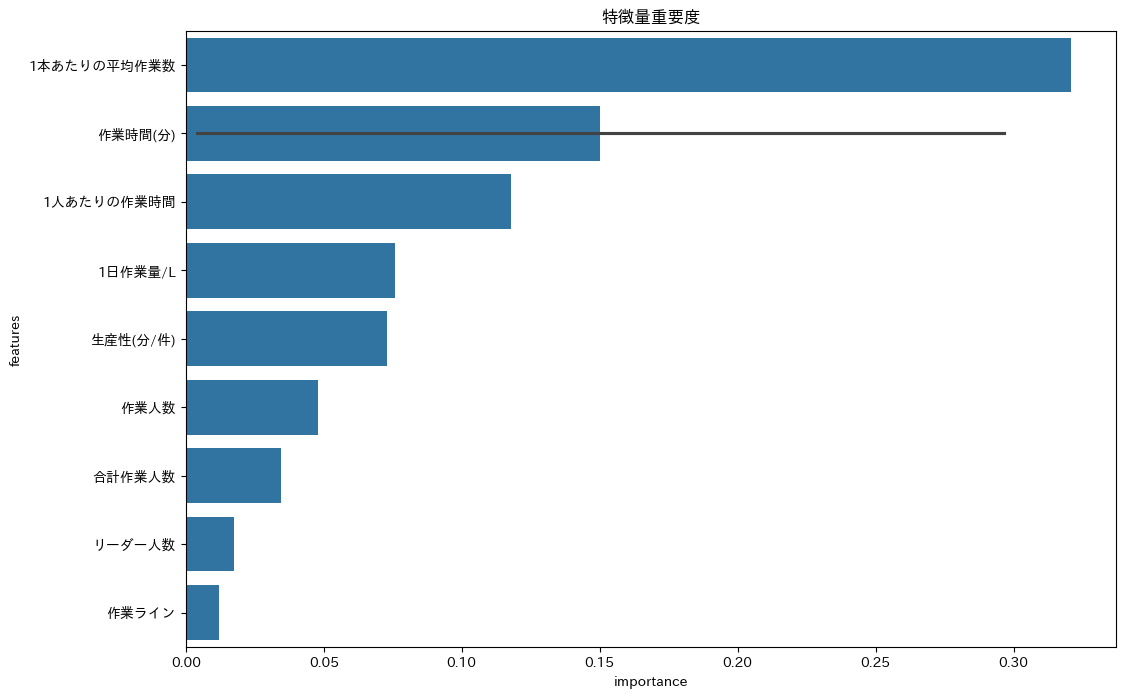

In [96]:
# 特徴量重要度を可視化
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_fontja
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='features', data=df)
plt.title('特徴量重要度')
plt.show()

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_fontja  # フォント設定

# 日本語フォントの設定
matplotlib_fontja.set_font("IPAexGothic")  # 好きなフォントに変更

# 特徴量重要度の可視化
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='features', data=df)
plt.title('特徴量重要度', fontsize=18)  # タイトルのフォントサイズを設定
plt.show()


AttributeError: module 'matplotlib_fontja' has no attribute 'set_font'